## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command

from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train,y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [11]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential
from keras.layers import Dense, Activation

In [12]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128
nb_epoch = 20

In [13]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim = input_dim , activation='softmax'))

In [14]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 77us/step - loss: 1.2810 - acc: 0.7024 - val_loss: 0.8117 - val_acc: 0.8344
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.7199 - acc: 0.8386 - val_loss: 0.6087 - val_acc: 0.8627
Epoch 3/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.5909 - acc: 0.8573 - val_loss: 0.5269 - val_acc: 0.8724
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.5288 - acc: 0.8673 - val_loss: 0.4812 - val_acc: 0.8796
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.4910 - acc: 0.8741 - val_loss: 0.4516 - val_acc: 0.8839
Epoch 6/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.4649 - acc: 0.8791 - val_loss: 0.4300 - val_acc: 0.8895
Epoch 7/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.4454 - acc: 0.8832 - val_loss: 0.4136 - val_acc

Test score: 0.33620980798006056
Test accuracy: 0.9087


<IPython.core.display.Javascript object>


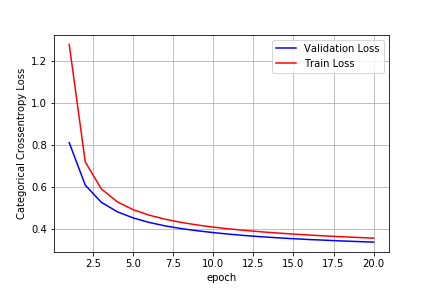

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [16]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation = 'sigmoid', input_shape = (input_dim,)))
model_sigmoid.add(Dense(128, activation = 'sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_sigmoid.compile(optimizer='sgd', loss= 'categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=2, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 2.2650 - acc: 0.2197 - val_loss: 2.2180 - val_acc: 0.3651
Epoch 2/20
 - 2s - loss: 2.1753 - acc: 0.4557 - val_loss: 2.1197 - val_acc: 0.5456
Epoch 3/20
 - 2s - loss: 2.0606 - acc: 0.5696 - val_loss: 1.9803 - val_acc: 0.6165
Epoch 4/20
 - 2s - loss: 1.8967 - acc: 0.6278 - val_loss: 1.7844 - val_acc: 0.6579
Epoch 5/20
 - 2s - loss: 1.6810 - acc: 0.6658 - val_loss: 1.5463 - val_acc: 0.7049
Epoch 6/20
 - 2s - loss: 1.4442 - acc: 0.7048 - val_loss: 1.3131 - val_acc: 0.7211
Epoch 7/20
 - 1s - loss: 1.2314 - acc: 0.7357 - val_loss: 1.1211 - val_acc: 0.7578
Epoch 8/20
 - 1s - loss: 1.0634 - acc: 0.7623 - val_loss: 0.9756 - val_acc: 0.7829
Epoch 9/20
 - 1s - loss: 0.9375 - acc: 0.7820 - val_loss: 0.8683 - val_acc: 0.7988
Epoch 10/20
 - 1s - loss: 0.8429 - acc: 0.7983 - val_loss: 0.7865 - val_acc: 0.8066
Epoch 11/20
 - 1s - loss: 0.7699 - acc: 0.8098 - val_loss: 0.7218 - val_acc: 0.8253
Epoch 12/20
 - 1s - loss: 0.7117 - 

Test score: 0.461559184551239
Test accuracy: 0.8781


<IPython.core.display.Javascript object>


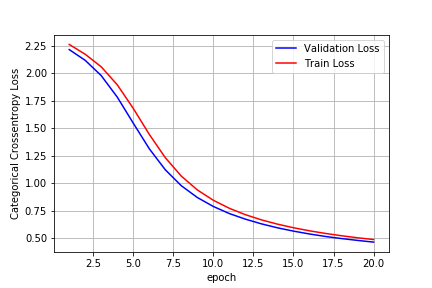

In [18]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


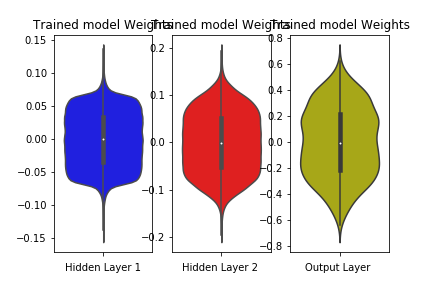

In [19]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP + Sigmoid activation + ADAM </h2>

In [20]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.5318 - acc: 0.8575 - val_loss: 0.2515 - val_acc: 0.9272
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.2210 - acc: 0.9356 - val_loss: 0.1900 - val_acc: 0.9430
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step - los

Test score: 0.06899056061149021
Test accuracy: 0.982


<IPython.core.display.Javascript object>


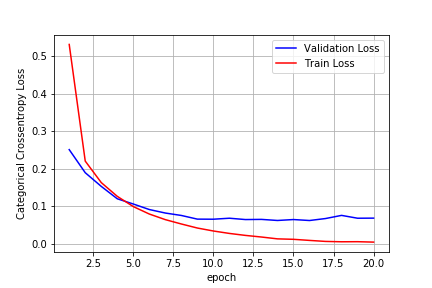

In [21]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


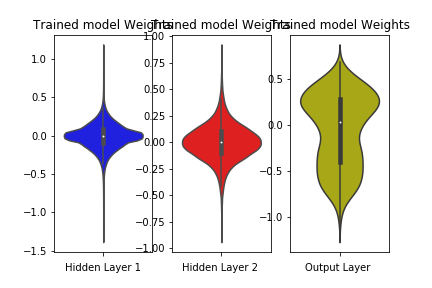

In [22]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU +SGD </h2>

In [23]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.7420 - acc: 0.7903 - val_loss: 0.3884 - val_acc: 0.8954
Epoch 2/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.3571 - acc: 0.9004 - val_loss: 0.3060 - val_acc: 0.9144
Epoch 3/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2965 - acc: 0.9157 - val_loss: 0.2663 - val_acc: 0.9260
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2626 - acc: 0.9255 - val_loss: 0.2441 - val_acc: 0.9318
Epoch 5/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2384 - acc: 0.9328 - val_loss: 0.2261 - val_acc: 0.9372
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2201 - acc: 0.9374 - val_loss: 0.2123 - val_acc: 0.9407
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2044 - acc: 0.9421 - val_loss: 0.1989 - val_acc

Test score: 0.12522794815078378
Test accuracy: 0.9644


<IPython.core.display.Javascript object>


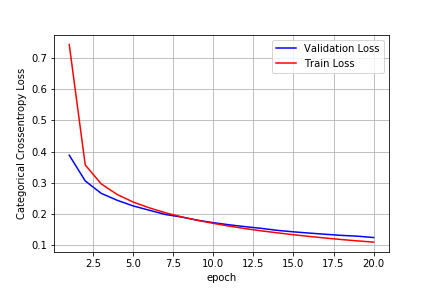

In [25]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


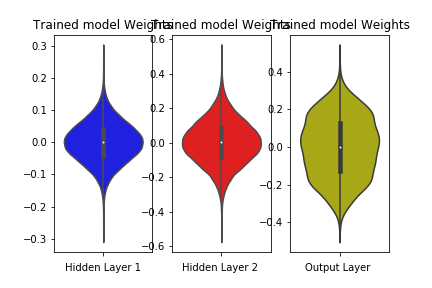

In [26]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU + ADAM </h2>

In [27]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2287 - acc: 0.9318 - val_loss: 0.1080 - val_acc: 0.9666
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0863 - acc: 0.9736 - val_loss: 0.0873 - val_acc: 0.9732
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step 

Test score: 0.08625322688757478
Test accuracy: 0.9825


<IPython.core.display.Javascript object>


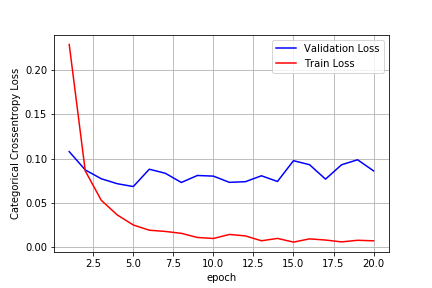

In [28]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


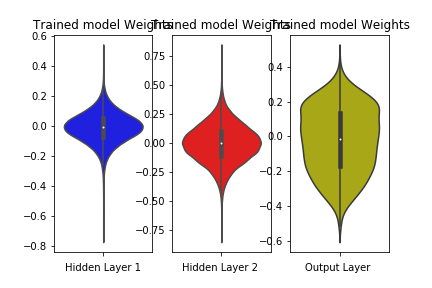

In [29]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [30]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [31]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.3064 - acc: 0.9091 - val_loss: 0.2140 - val_acc: 0.9376
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1773 - acc: 0.9482 - val_loss: 0.1694 - val_acc: 0.9491
Epoch 3/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1395 - acc: 0.9585 - val_loss: 0.1534 - val_acc: 0.9536
Epoch 4/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.1178 - acc: 0.9643 - val_loss: 0.1362 - val_acc: 0.9559
Epoch 5/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0985 - acc: 0.9701 - val_loss: 0.1283 - val_acc: 0.9618
Epoch 6/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0862 - acc: 0.9739 - val_loss: 0.1187 - val_acc: 0.9637
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0715 - acc: 0.9782 - val_loss: 0.1199 - val_acc

Test score: 0.10023980196393095
Test accuracy: 0.9739


<IPython.core.display.Javascript object>


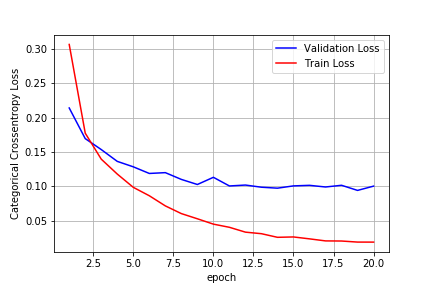

In [32]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


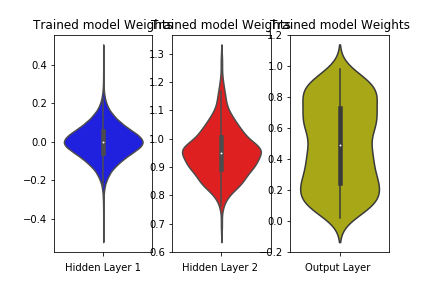

In [33]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [34]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total para

In [35]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.6603 - acc: 0.7964 - val_loss: 0.2839 - val_acc: 0.9180
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.4279 - acc: 0.8698 - val_loss: 0.2545 - val_acc: 0.9266
Epoch 3/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.3804 - acc: 0.8860 - val_loss: 0.2336 - val_acc: 0.9314
Epoch 4/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.3548 - acc: 0.8930 - val_loss: 0.2179 - val_acc: 0.9375
Epoch 5/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.3358 - acc: 0.8993 - val_loss: 0.2147 - val_acc: 0.9367
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.3227 - acc: 0.9024 - val_loss: 0.2086 - val_acc: 0.9393
Epoch 7/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.3096 - acc: 0.9069 - val_loss: 0.1963 - val_acc

Test score: 0.10942418469991536
Test accuracy: 0.9658


<IPython.core.display.Javascript object>


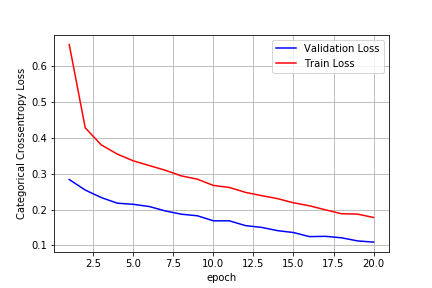

In [36]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


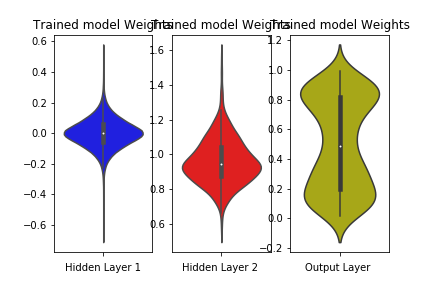

In [37]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [38]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [39]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [40]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977233 using {'activ': 'relu'}
0.974850 (0.001206) with: {'activ': 'sigmoid'}
0.977233 (0.002522) with: {'activ': 'relu'}


**Keras with Two Hidden Layer**

In [41]:

from keras.initializers import TruncatedNormal

model_one = Sequential()

#Dense Layer with 256 units
model_one.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
model_one.add(BatchNormalization())
model_one.add(Dropout(0.5))

#Dense Layer with 256 units
model_one.add(Dense(128, activation='relu', kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
model_one.add(BatchNormalization())
model_one.add(Dropout(0.5))

#Output layer
model_one.add(Dense(output_dim, activation='softmax'))

#Summary of the model
model_one.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1290      
Total para

In [42]:
#Compiling and Training the model
model_one.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])
history= model_one.fit(X_train, Y_train, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.4433 - acc: 0.8661 - val_loss: 0.1486 - val_acc: 0.9555
Epoch 2/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.2686 - acc: 0.9191 - val_loss: 0.1162 - val_acc: 0.9632
Epoch 3/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.2258 - acc: 0.9331 - val_loss: 0.1028 - val_acc: 0.9673
Epoch 4/20
60000/60000 [==============================] - 13s 208us/step - loss: 0.2013 - acc: 0.9394 - val_loss: 0.0946 - val_acc: 0.9704
Epoch 5/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.1833 - acc: 0.9440 - val_loss: 0.0850 - val_acc: 0.9730
Epoch 6/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.1702 - acc: 0.9491 - val_loss: 0.0845 - val_acc: 0.9742
Epoch 7/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.1572 - acc: 0.9521 - val_loss: 0.

Test score: 0.06118578307698481
Test accuracy: 0.9808


<IPython.core.display.Javascript object>


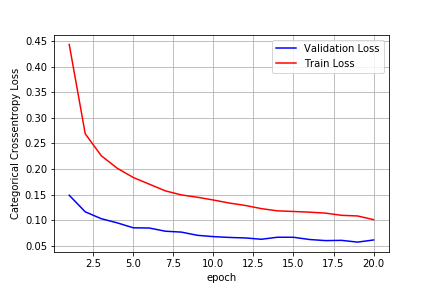

In [43]:
score = model_one.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Keras Model with three Hidden layer**

In [44]:
model_two =  Sequential()

#Dense layer with 512 Units
model_two.add(Dense(512, activation='relu' ,input_shape=(input_dim,), use_bias=True , bias_initializer='zeros', kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
model_two.add(BatchNormalization())
model_two.add(Dropout(0.5))

#Dense layer with 256 Units
model_two.add(Dense(256, activation='relu', use_bias=True , bias_initializer='zeros', kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
model_two.add(BatchNormalization())
model_two.add(Dropout(0.5))

#Dense layer with 128 Units
model_two.add(Dense(128, activation='relu', use_bias=True , bias_initializer='zeros', kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
model_two.add(BatchNormalization())
model_two.add(Dropout(0.5))

#Output layer
model_two.add(Dense(output_dim, activation='softmax'))

#Summary
model_two.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               32896     
__________

In [45]:
#Compile and Fitting of the model
model_two.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_two.fit(X_train, Y_train, epochs=nb_epoch, verbose=1 , validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 287us/step - loss: 0.4836 - acc: 0.8539 - val_loss: 0.1376 - val_acc: 0.9552
Epoch 2/20
60000/60000 [==============================] - 15s 248us/step - loss: 0.2713 - acc: 0.9186 - val_loss: 0.1211 - val_acc: 0.9612
Epoch 3/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.2224 - acc: 0.9350 - val_loss: 0.0974 - val_acc: 0.9697
Epoch 4/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.2059 - acc: 0.9401 - val_loss: 0.0875 - val_acc: 0.9732
Epoch 5/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.1839 - acc: 0.9456 - val_loss: 0.0788 - val_acc: 0.9752
Epoch 6/20
60000/60000 [==============================] - 15s 247us/step - loss: 0.1676 - acc: 0.9507 - val_loss: 0.0806 - val_acc: 0.9743
Epoch 7/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.1562 - acc: 0.9542 - val_loss: 0.

Test score: 0.05568293856019154
Test accuracy: 0.9828


<IPython.core.display.Javascript object>


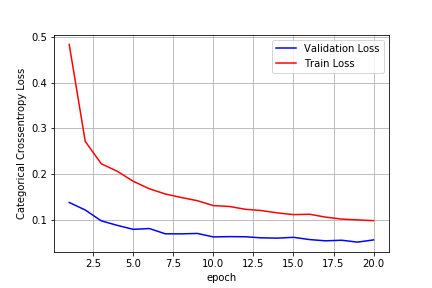

In [46]:
#Plotting Train and Validation loss
score = model_two.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Keras Model with Five layer**

In [47]:
model_three =  Sequential()

#Dense layer with 512 Units
model_three.add(Dense(512, activation='relu' ,input_shape=(input_dim,), use_bias=True , bias_initializer='zeros', kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
model_three.add(BatchNormalization())
model_three.add(Dropout(0.8))

#Dense layer with 256 Units
model_three.add(Dense(256, activation='relu', use_bias=True , bias_initializer='zeros', kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
model_three.add(BatchNormalization())
model_three.add(Dropout(0.8))

#Dense layer with 128 Units
model_three.add(Dense(128, activation='relu', use_bias=True , bias_initializer='zeros', kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
model_three.add(BatchNormalization())
model_three.add(Dropout(0.8))

#Dense layer with 64 Units
model_three.add(Dense(64, activation='relu', use_bias=True , bias_initializer='zeros', kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
model_three.add(BatchNormalization())
model_three.add(Dropout(0.8))

#Dense layer with 32 Units
model_three.add(Dense(32, activation='relu', use_bias=True , bias_initializer='zeros', kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
model_three.add(BatchNormalization())
model_three.add(Dropout(0.8))

#Output layer
model_three.add(Dense(output_dim, activation='softmax'))

#Summary
model_two.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               32896     
__________

In [48]:
#Compile and Fitting of the model
model_three.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_three.fit(X_train, Y_train, epochs=nb_epoch, verbose=1 , validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 399us/step - loss: 2.5831 - acc: 0.1278 - val_loss: 2.1672 - val_acc: 0.1867
Epoch 2/20
60000/60000 [==============================] - 21s 346us/step - loss: 2.0203 - acc: 0.2190 - val_loss: 1.6453 - val_acc: 0.4330
Epoch 3/20
60000/60000 [==============================] - 21s 345us/step - loss: 1.6824 - acc: 0.3200 - val_loss: 1.2307 - val_acc: 0.3955
Epoch 4/20
60000/60000 [==============================] - 21s 347us/step - loss: 1.5501 - acc: 0.3587 - val_loss: 1.1729 - val_acc: 0.4640
Epoch 5/20
60000/60000 [==============================] - 21s 358us/step - loss: 1.4942 - acc: 0.3756 - val_loss: 1.1356 - val_acc: 0.4797
Epoch 6/20
60000/60000 [==============================] - 21s 347us/step - loss: 1.4715 - acc: 0.3866 - val_loss: 1.1019 - val_acc: 0.5135
Epoch 7/20
60000/60000 [==============================] - 21s 346us/step - loss: 1.4435 - acc: 0.3995 - val_loss: 1.

Test score: 0.05568293856019154
Test accuracy: 0.9828


<IPython.core.display.Javascript object>


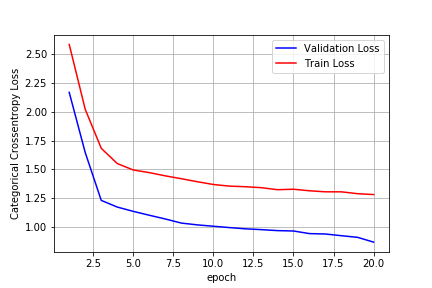

In [49]:
#Plotting Train and Validation loss
score = model_two.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Create A MLP Model using TensorFlow**

In [50]:
## I have Taken help of https://www.tensorflow.org/api_docs/python

from __future__ import print_function

import tensorflow as tf

#Data is already extracted and Normalize(X_train, Y_train), we will define parameter now

learning_rate = 0.001
training_epochs = 20
batch_size = 100
display_step = 5

#Network Parameters
n_hidden_1 = 512 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_hidden_3 = 128 # 3rd layer number of neurons
n_inputs = 784 # MNIST data input
n_classes = 10 # MNIST total classes

#tf Graph input

X = tf.placeholder("float",[None,n_inputs])
Y = tf.placeholder("float",[None, n_classes])
keep_prob = tf.placeholder(tf.float32)

#Store layers weight and biases

weights ={
    'h1': tf.Variable(tf.random.truncated_normal([n_inputs,n_hidden_1])),
    'h2': tf.Variable(tf.random.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3': tf.Variable(tf.random.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4': tf.Variable(tf.random.truncated_normal([n_hidden_3,n_classes]))
}

biases ={
    'b1': tf.Variable(tf.random.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.random.truncated_normal([n_classes]))
} 

In [51]:
#Create Model

def multilayer_perceptron(x):
    #Hiddn Layers
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x,weights['h1']), biases['b1']))
    layer_1 = tf.nn.dropout(tf.layers.batch_normalization(layer_1,axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True), 0.5)        # Adding Batch Normalization and Dropout for first layer 1
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1,weights['h2']), biases['b2']))
    layer_2 = tf.nn.dropout(tf.layers.batch_normalization(layer_2,axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True), 0.5)        # Adding Batch Normalization and Dropout for first layer 2
    layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2,weights['h3']), biases['b3']))
    layer_3 = tf.nn.dropout(tf.layers.batch_normalization(layer_3,axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True), 0.5)        # Adding Batch Normalization and Dropout for first layer 3
    out_layer = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    
    return out_layer


#Construct Model
logits = multilayer_perceptron(X)

# Define loss and Optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate)
train_op = optimizer.minimize(loss_op)


In [52]:
#Initializing Global Variable

init = tf.initialize_all_variables()

with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    #for loop for number of epoch to train the data
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(X_train.shape[0]/batch_size)
        #loop for each and every batch of data
        for i in range(total_batch):
            lower_limit = i * batch_size
            upper_limit = (i+1) * batch_size 
            batch_x = X_train[lower_limit:upper_limit,:]
            batch_y = Y_train[lower_limit:upper_limit,:]
            #Run optimization operation(backpropagation) and cost operation(to get loss value)
            _, c = sess.run([train_op, loss_op], feed_dict={X:batch_x, Y:batch_y})
            
            #Compute Average loss
            avg_cost = avg_cost + c/total_batch 
                        
            
    # TEST MODEL

    pred = tf.nn.softmax(logits)  # apply sotfmax to logits
    correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(Y,1))

    #Calculate Accuracy

    accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))
    accuracy = sess.run([accuracy], feed_dict={X: X_test, Y: Y_test})
    print(accuracy)
    

       

[0.1119]
